## Reference : 
- https://www.kaggle.com/julian3833/jigsaw-incredibly-simple-naive-bayes-0-768
- https://www.kaggle.com/samarthagarwal23/mega-b-ridge-to-the-top-0-84 

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
import re 
import scipy
from scipy import sparse
import gc 
from IPython.display import display, HTML
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_colwidth=300

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
print(df.shape)

for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))

(159571, 8)
****** toxic *******


,comment_text,toxic
36321,"The conclusion is obvious - when you don't like what someone says because it's true, do what the Nazis did and silence that person. How Jewish of you! 12.176.152.194",1
159336,"Oh, fuck off. The pansy Jew would just whine about it to the B'nai Brith and beat a Palestinian child over it.",1
116700,"How's about you shut the fuck up instead... \n\nIf your going to use wiki to write history, at least make that history truthful and accurate instead of spreading right wing racist viewpoints you nazi piece of shit! Go die in a hole somewhere\n\ndont censor you racist",1
23253,"""\n\n Who writes this Garbage? \n\n""""Known publicly as an experimental group, Garbage used their powerful videos to distort the dimensions of their songs."""" Does any part of that sentence make any sense? The answer is no.\n\n""",1
24995,HOOOOOOOOOOOOOOOOOOOOOOOOOOO!!! \n\nHES AN ASS THAT LINUXBEAK IS,1
69801,""" 2006 (UTC)\n\n On notability \n\nOne admin doesn't decide """"notability"""". Please, stop acting like a smartass, and talk some sane.. """"they are asshats, I'm an admin, I didn't violate any rules, and NO, THEY ARE NOT NOTABLE"""". Sounds like real bullshit going on here. You see, I already mentione...",1
16185,"Oh diddums, did I hit a sore spot? Personal attack, is it? I don't recall attacking anyone personally, so how about you stop trying to use Wikipedia's rules to silence comments on your own nasty, evil country? You don't like me talking about 9/11? Too bad! I will reference it as many times as it...",1
97060,"""\n\nCrappy organization\nPeople should be listed by era in which they acted, not when they were born. If not then at least find a better way to organize them as by birth date is confusing and somewhat irrelevent. If you're going to stick with this particular categorial method then at least he...",1
8141,"Useless piece of shit \n\nYou're an asshole, you useless piece of shit. Get a life, instead of deleting pages of loved ones who never did anything to harm you. Motherfuker.",1
28118,I am going to shoot you in the head and laugh as your brains splatter onto the ground \n\nI am going to shoot you in the head and laugh as your brains splatter onto the ground,1


****** severe_toxic *******


,comment_text,severe_toxic
147977,Ima gona slash your tires!!!!!!!!!!!!!!!!!!!!!!!!!!!!! \n\nWhat the fuck is your problem you little schoolyard picnic bitch!!!!!!!!!!!!!\nTHis is the motha fuckin guy that did the gears of war thing motha fucka.\nSo ima get mah niggas all up in yo grill motha fucka.... Is this really how u fucki...,1
97811,SHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FUCK UP!\nSHUT THE FU...,1
34363,Your general suckitude \n\nGet your cock out of your mouth and ban me. I can't believe you haven't realised all the awful things I have done to your Wikipedia. Why am I telling you this? Good question. Maybe I have problems.,1
152350,"""\n\n""""Bitch, suck my dick before I slap you with it.""""""""Bitch, suck my dick before I slap you with it.""""""""Bitch, suck my dick before I slap you with it.""""""""Bitch, suck my dick before I slap you with it.""""""""Bitch, suck my dick before I slap you with it.""""""""Bitch, suck my dick before I slap you w...",1
61537,Bastard \n\nYou fat bastard! You have done it! Your end will come! Blood from your throat! Death in the air! And the DN group returned! And your blood is a sight of glory! You fat bastard! Sayonarra and go on a diet!,1
110964,THEY SHOULD DIE\nAND PLEASE NOTE TOO THAT\nbush sucks\nBush sucks\nbUsh sucks\nbuSh sucks\nbusH sucks\nbush Sucks\nbush sUcks\nbush suCks\nbush sucKs\nbush suckS\nbush sucks\nBush sucks\nbUsh sucks\nbuSh sucks\nbusH sucks\nbush Sucks\nbush sUcks\nbush suCks\nbush sucKs\nbush suckS\nbush sucks\nB...,1
60805,You and Jack greenmaven are MotherFuckers,1
142636,"""== Hey Fuck-head==\nHey, just wanted to say """"Hey Fuck-head"""" seeing as you're a complete fuck-head. Do not forgive. Do not forget. Fuck you shit bitch. Go on - ban me. That's the wikipedia way. Just shut out the objectors (to the admin power trip) and go on with your day. If people like you ru...",1
52371,Fuck you asshole! \n\nGo fuck yourself! Dirty fuckin' asshole! Fuckin' scum!,1
121505,Tommy \n\nFuck yo couch nigga!,1


****** obscene *******


,comment_text,obscene
133295,Your a FUCKING Jew\n\nAll Jews do is wine wine wine\n\nAll they want is money and power\n\nthey hide there fucking jew gold and act poor so they can get more money for the pussies who feel bad for poor people,1
127052,"Congratulations! \n\nCongratulations, Triste Tierra, you have won the asshole of the year award! You won this award by harassing users in the past and saying hateful things about and to them! In order to claim your award, you must call 1-800-Asshole (1-800-277-4653)! Once again, Congratulations ...",1
110154,"Why don't you get your tongue out of Shaikh's ass, no one gives a damn what he thinks of his own article on Wikipedia. The images are self-promotional and you know it.",1
121922,"""\nGee, 5 minutes of reverting redirects cost you precious time. I am sooooooo sorry bout that. I have been back to the page and, aside from revisiting burned bridges, i admire the work poured in. But it does not excuse the way you treated me. And before you go into a hoopla about how i acted, i...",1
158490,I didn't vandalise it you cockface! \n\nI just told you shut up and sit down.,1
72792,. PS. FUCK U BITCH GO EAT A DICK HO. PROBABLY DILDO URSELF TO SEAN KINGSTON'S ALBUM COVER.,1
120567,"""\n\n""""In the history of the world, every building ever hit by a jumbo jet in flight has collapsed."""" Does it hurt to be such a moron?""",1
146537,I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE DICK MORE THAN ANYTHING \n\n I LOVE D...,1
101721,fuck you faggot \nfuck you faggot,1
9363,"She pisses off \n\nGo piss of butt, so you know that you just heard me that I will use a fork to take and destroy your eyes and take out your FUCKIN! blood, so just piss off butt, piss off but, I SAID PISS OFF BUTT, last chance: PISS OFF BUTT!, that's it, I will kill you, pow, so see that, you a...",1


****** threat *******


,comment_text,threat
6613,"Who the HELL do you think you are? \n\nHow dare you revert my edit to Quillacollo Province. I was making a friend smile, and you ruined it. In doing that, you also ruined my life. And my friends life. I'm going to cut your dog in half.",1
75271,"""\n\n D€ATH TO NORWEGIANS AND ALL ANTI-SEℳITES WHO SIDE WITH THE """"PALESTINIANS."""" D€ATH TO THE NATION THAT PRODUCED QUISLING. \n\n€UROTRASH ₩HORE. FU₵KING COMMIE SCUM.""",1
154830,", im going to knock you over the head with a baseball bat",1
32098,Fuck All Asyriac Nation \n\nQamishli belong to Arminian and we will fuck all Asyriac people if they will said no.,1
141791,why you are a bastard \n\nI hope your dog dies.,1
8976,hello moto \n\nhello flygayguy649 i hope u get a dick stuck up your ass i am a 13 year old kkk member. and i'll kick your ass so stay away and dont delete my pages. BITCH!!!,1
101733,My Thoughts \n\nYou're a fucking piece of shit! Die and Burn in hell!,1
4712,do go fuck off bastard\nDo Yyou Have a life?\ngo fuck off bastard and yank your cock through your ass. I hate you and hope you go away forever. lame is you fuck your mom. die die die and all that crap. this is for mahy mahonerz\nass. I ass. I ass. I ass. I ass. I ass. I ass. I ass. I ass. I ass....,1
61934,"orders\n\nDreamjerk has no right to order anyone to do anything. He is one of the more hated \nmembers of Wikipedia. Opponents just go on and do what you need to do.\n\nDaggers in back of Jack the Ripper, lubed by butter, falling on Rhobite.\n\nYou wanna play, we can play.\n\nButterknife.\n\n+++...",1
76729,"""\n\n A knife for you! \n\n A knife for you! One of this days, I am going to cut you into little pieces… """,1


****** insult *******


,comment_text,insult
54438,"Why don't you read about what I said about being blocked?! Clever people don't give a fuck about it. You need to realise it, as your life is dripping away on being Wikipedia's bitch. Fucking flea brained loser.",1
29736,stop being a pussbot \n\nstop being a pussbot. you are extremely biased. Wikipedia cannto tolerate users like you. stop being a shudslavpus,1
37579,Why are you being such a jerk?,1
143148,"you sound an utterly nasty bully you are not a cat you are petty hitler as simple as that, you have banned from eding live in real world hopw is banning me going to make me calm down you little hitler bully, i will find out who you are and see if i can get you on any petty law infringements and ...",1
121067,"do you mean by seems to? More like does, dumbass. \n\nWhat",1
92744,that whoever deletes shit from wikipedia had a small dick and is a loser which mother is a whore?!,1
28878,"""Niggers and their liberal friends steal everything not tied down, just like the presidency here with acorn with its liberal defenders, FUCK YOU NIGGER """"OBAMA""""!!\n\n""",1
31777,"Have you seen thier forum lately? There is a new picture of you up with dicks all over it, cumming in your face!",1
33574,That clown guy sucks major cock. User:Daniel,1
73464,", and I hope you enjoy dying of radiation, you fucking pussy.",1


****** identity_hate *******


,comment_text,identity_hate
118029,why'd you remove that \n\nu nlgga,1
45290,"Ossmann,are you jew or your father was an SS officer?",1
98459,"These blood-thirsty liberal lynch mobs wanted to turn Trayvon into another Emmett Till. No, not kidding again. They are so full of intense HATRED towards white people, that when the perp turns out to NOT be white....they make him white anyway! lol",1
60071,im gonna guess you are the same bigoted non normal that wrote this hate page in the first place. you and your gay friends are all pedophiles.,1
32746,"Ungrateful monkey men \n\nHow dare they take arms against the dutch and british who spent years trying to free them from japanese tyranny, and after turning their series of islands into a civlized society. Fuck em, they should all be nuked.58.107.179.146",1
41461,Nazis like you deserve worse than death. \n\nI will make sure you suffer horribly.,1
27198,"White Trash\nFuck off you white piece of trash. Fucking wiggers. Go and fuck a Jew, Jew raper.",1
136169,You can go fuck yourself \n\nShit on your robot clit shitgiggler,1
11053,"""\n\nToo funny\n\ncorey suggests a famous people section from moline or historical signicance section, but that is just too funny. These guys will probably tell you about some confederate hero or plantation owner or other backwood gomer. """"What do you call a person from Moline who has all thei...",1
108906,"""\n\nfisto is a retard nigger.""",1


In [3]:

# Give more weight to severe toxic 
df['severe_toxic'] = df.severe_toxic * 2
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df['y'] = df['y']/df['y'].max()

df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

,text,y
127076,"""141.166.153.89, you said it yourself, it is """"not... a legit country"""", though """"it is a government"""" that governs territory. For this very reason, it is wrong to have it listed under """"countries..."""", as it goes against the fact. Now, if it were to be removed completely, it would be considered...",0.0
78776,"""\n\n Boston Breakers Seasons \n\nDid Lilly play for the Breakers during the 2011 season? I read that she retired after the 2010 season. If so, in the Infbox under Senior Career shouldn't the listing for the Boston Breakers (WPS) be """"2009-2010""""? ~ """,0.0
88879,"""\n Sure, my dear friend! Holla at me! """,0.0
1077,Thanks for your efforts in trying to resolve this matter. I will respond to all these matters. I am just a little hard pressed for time at the moment. I might have to wait until the weekend when I have plenty of time to think about my stupid actions and to express in full detail my remorse to th...,0.0
11738,"Close paraphrasing \nFrom User_talk:Judae1 - I would say thank you, but I am also unsure of what this referred to. I read the citation page, but still don't know what I wrote. Can you link me to an edit and the change?\nMuch appreciated.",0.0


In [4]:
df['y'].value_counts()

0.000000    143346
0.142857      6360
0.428571      4064
0.285714      3439
0.714286      1064
0.571429       938
0.857143       329
1.000000        31
Name: y, dtype: int64

## Create 3 versions of the data

In [5]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

# Create 3 versions of __clean__ data

In [6]:
def clean(data, col):

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    
    return data

In [7]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)
clean(test_clean_df,'text')

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy \n \n kkdsfj
1,hi how / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [8]:
df = clean(df,'text')

In [9]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_clean_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

In [10]:
del df,tmp_df
gc.collect()

21

## Ruddit data

(5838, 5)


<AxesSubplot:>

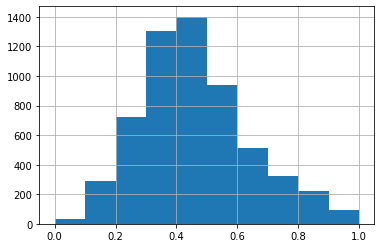

In [11]:
df_ = pd.read_csv("../input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv")
print(df_.shape)

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min()) 
df_.y.hist()

# Create 3 versions of data

In [12]:
n_folds = 7

frac_1 = 0.7

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = df_.sample(frac=frac_1, random_state = 10*(fld+1))
    tmp_df.to_csv(f'/kaggle/working/df2_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(4087, 2)
0.464668    125
0.475910    106
0.375268     94
0.442719     92
0.364561     89
           ... 
0.400964      1
0.889722      1
0.582976      1
0.404711      1
0.761242      1
Name: y, Length: 268, dtype: int64
Fold: 1
(4087, 2)
0.464668    107
0.475910    103
0.408994    102
0.386510     97
0.364561     88
           ... 
0.851713      1
0.859743      1
0.051927      1
0.666488      1
0.594754      1
Name: y, Length: 264, dtype: int64
Fold: 2
(4087, 2)
0.464668    118
0.475910    102
0.386510     94
0.442719     92
0.364561     89
           ... 
0.261777      1
0.238223      1
0.123126      1
0.694861      1
0.309422      1
Name: y, Length: 265, dtype: int64
Fold: 3
(4087, 2)
0.464668    116
0.475910    106
0.386510     93
0.408994     92
0.364561     90
           ... 
0.238223      1
0.561028      1
0.404711      1
0.806210      1
0.184154      1
Name: y, Length: 263, dtype: int64
Fold: 4
(4087, 2)
0.464668    122
0.475910    114
0.386510    100
0.442719     91
0.

In [13]:
del tmp_df, df_; 
gc.collect()

42

## Load Validation and Test data  


In [14]:
# Validation data 

df_val = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")

In [15]:
# Test data

df_sub = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")


# Create Sklearn Pipeline with 
## TFIDF - Take 'char_wb' as analyzer to capture subwords well
## Ridge - Ridge is a simple regression algorithm that will reduce overfitting 

In [16]:
# NOT USED 
class LengthTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[(len(x)-360)/550] for x in X])
    def get_feature_names(self):
        return ["lngth"]

class LengthUpperTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[sum([1 for y in x if y.isupper()])/len(x)] for x in X])
    def get_feature_names(self):
        return ["lngth_uppercase"]

### Does % of uppercase characters have effect on toxicity


0.06762926181756569 0.1429820536279063
0.10522553566497922 0.20361944552165576


<AxesSubplot:>

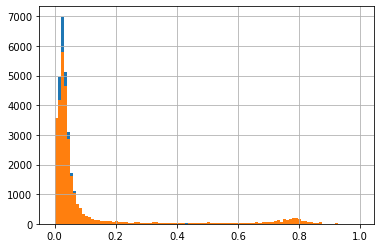

In [17]:

df_val['upper_1'] = np.array(LengthUpperTransformer().transform(df_val['less_toxic']).todense()).reshape(-1,1)
df_val['upper_2'] = np.array(LengthUpperTransformer().transform(df_val['more_toxic']).todense()).reshape(-1,1)

print(df_val['upper_1'].mean(), df_val['upper_1'].std())
print(df_val['upper_2'].mean(), df_val['upper_2'].std())

df_val['upper_1'].hist(bins=100)
df_val['upper_2'].hist(bins=100)

## Train pipeline

- Load folds data
- train pipeline
- Predict on validation data
- Predict on test data

### Toxic data

In [18]:
val_preds_arr1 = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2 = np.zeros((df_val.shape[0], n_folds))
test_preds_arr = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 146616
[('vect3__uck', 0.53),
 ('vect3__fuc', 0.49),
 ('vect3__ ass', 0.4),
 ('vect3__fuck', 0.38),
 ('vect3__ f ', 0.34),
 ('vect3__ass', 0.32),
 ('vect3__fag', 0.32),
 ('vect3__shit', 0.31),
 ('vect3__ f*', 0.3),
 ('vect3__ fag', 0.29),
 ('vect3__gay', 0.28),
 ('vect3__nig', 0.28),
 ('vect3__nl3', 0.28),
 ('vect3__ fu', 0.27),
 ('vect3__dick', 0.27),
 ('vect3__hit', 0.27),
 ('vect3__nigg', 0.27),
 ('vect3__ck ', 0.26),
 ('vect3__fuk', 0.26),
 ('vect3__ g ', 0.25),
 ('vect3__ nl', 0.25),
 ('vect3__ die', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__dum', 0.24),
 ('vect3__gga', 0.24),
 ('vect3__kill ', 0.24),
 ('vect3__ ass.', 0.23),
 ('vect3__ u ', 0.23),
 ('vect3__cun', 0.23),
 ('vect3__igg', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 145297


# Toxic __clean__ data

In [19]:
val_preds_arr1c = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2c = np.zeros((df_val.shape[0], n_folds))
test_preds_arrc = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_clean_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1c[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2c[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arrc[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 133784
[('vect3__uck', 0.5),
 ('vect3__ f ', 0.48),
 ('vect3__fuc', 0.45),
 ('vect3__ ass', 0.37),
 ('vect3__fuck', 0.35),
 ('vect3__shit', 0.32),
 ('vect3__ ck', 0.31),
 ('vect3__fag', 0.31),
 ('vect3__ fu', 0.29),
 ('vect3__ass', 0.29),
 ('vect3__ k ', 0.28),
 ('vect3__ re ', 0.28),
 ('vect3__hit', 0.28),
 ('vect3__ck ', 0.27),
 ('vect3__fuk', 0.27),
 ('vect3__nig', 0.27),
 ('vect3__nl3', 0.27),
 ('vect3__ fag', 0.26),
 ('vect3__gga', 0.26),
 ('vect3__dick', 0.25),
 ('vect3__gay', 0.25),
 ('vect3__suck', 0.25),
 ('vect3__ ass.', 0.24),
 ('vect3__ g ', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__ nl', 0.24),
 ('vect3__nigg', 0.24),
 ('vect3__ ass ', 0.23),
 ('vect3__ fuk', 0.23),
 ('vect3__ rape', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 13

## Ruddit data pipeline

In [20]:
val_preds_arr1_ = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2_ = np.zeros((df_val.shape[0], n_folds))
test_preds_arr_ = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df2_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1_[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2_[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr_[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(4087, 2)

Train:

Total number of features: 31907
[('vect3__fuc', 0.59),
 ('vect3__fuck', 0.59),
 ('vect3__uck', 0.55),
 ('vect3__ fuc', 0.52),
 ('vect3__ fuck', 0.52),
 ('vect3__ fu', 0.42),
 ('vect3__shit', 0.4),
 ('vect3__hit', 0.37),
 ('vect3__ shit', 0.36),
 ('vect3__fuck ', 0.34),
 ('vect3__ck ', 0.32),
 ('vect3__uck ', 0.31),
 ('vect3__shi', 0.29),
 ('vect3__ shi', 0.28),
 ('vect3__ ass ', 0.27),
 ('vect3__sex', 0.26),
 ('vect3__ ass', 0.25),
 ('vect3__ dick', 0.25),
 ('vect3__dick', 0.25),
 ('vect3__ dic', 0.24),
 ('vect3__ sex', 0.24),
 ('vect3__ sh', 0.23),
 ('vect3__shit ', 0.23),
 ('vect3__ass', 0.21),
 ('vect3__ di', 0.19),
 ('vect3__ du', 0.18),
 ('vect3__!!!', 0.18),
 ('vect3__dic', 0.18),
 ('vect3__ex ', 0.18),
 ('vect3__hit ', 0.18)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(4087, 2)

Train:

Total number of features:

In [21]:
del df, pipeline, feature_wts
gc.collect()

597

# Validate the pipeline 

In [22]:
print(" Toxic data ")
p1 = val_preds_arr1.mean(axis=1)
p2 = val_preds_arr2.mean(axis=1)

print(f'Validation Accuracy is { np.round((p1 < p2).mean() * 100,2)}')

print(" Ruddit data ")
p3 = val_preds_arr1_.mean(axis=1)
p4 = val_preds_arr2_.mean(axis=1)

print(f'Validation Accuracy is { np.round((p3 < p4).mean() * 100,2)}')

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')


 Toxic data 
Validation Accuracy is 68.46
 Ruddit data 
Validation Accuracy is 62.56
 Toxic CLEAN data 
Validation Accuracy is 68.28


In [23]:
print("Find right weight")

wts_acc = []
for i in range(30,70,1):
    for j in range(0,20,1):
        w1 = i/100
        w2 = (100 - i - j)/100
        w3 = (1 - w1 - w2 )
        p1_wt = w1*p1 + w2*p3 + w3*p5
        p2_wt = w1*p2 + w2*p4 + w3*p6
        wts_acc.append( (w1,w2,w3, 
                         np.round((p1_wt < p2_wt).mean() * 100,2))
                      )
sorted(wts_acc, key=lambda x:x[3], reverse=True)[:5]

Find right weight


[(0.54, 0.29, 0.16999999999999998, 69.04),
 (0.55, 0.29, 0.15999999999999998, 69.04),
 (0.56, 0.29, 0.14999999999999997, 69.04),
 (0.61, 0.28, 0.10999999999999999, 69.03),
 (0.64, 0.24, 0.12, 69.03)]

In [24]:
w1,w2,w3,_ = sorted(wts_acc, key=lambda x:x[2], reverse=True)[0]
#print(best_wts)

p1_wt = w1*p1 + w2*p3 + w3*p5
p2_wt = w1*p2 + w2*p4 + w3*p6


## Analyze bad predictions 
### Incorrect predictions with similar scores
### Incorrect predictions with different scores

In [25]:
df_val['p1'] = p1_wt
df_val['p2'] = p2_wt
df_val['diff'] = np.abs(p2_wt - p1_wt)

df_val['correct'] = (p1_wt < p2_wt).astype('int')


In [26]:

### Incorrect predictions with similar scores

df_val[df_val.correct == 0].sort_values('diff', ascending=True).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
21672,674,"""Why is there even an """"Edit"""" option anyway?\nMaybe if they took it off there wouldn't be as much vandalism.\n\n""","I've blocked you (again, sigh). .",0.027027,0.028571,0.199004,0.198983,0.000021,0
23238,666,"""It's not all of a sudden, check the article's discussion page, I have proven that he's an Arab: so, not all sources agree. Also, please do tell me what other """"numerous sources"""" you have to provide? Obviously it's a weasel word, you only have one source, same as me. This makes it at the very ...","""bomb in the Diplomat hotel 20 minutes ago...after the feast...tell the government that we will destroy everyplace."""" \n """,0.020000,0.008264,0.251985,0.251951,0.000034,0
465,9,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
466,171,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
467,729,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
14876,513,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
14877,268,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
2934,686,"""\n\nOh hell... i will not remove my personel opionion... can't you make it simple for all and block me for 2 weeks due to my personal attack?... [here is something funny, consider it as a break for exhausting thoughts """"Lost - what happens next"""" > ] ""","Drop Dead! \n\nI'm not gonna bother with you, wait till my dad comes.",0.007905,0.044118,0.242708,0.242603,0.000104,0
4862,173,"""No, what you've done is prove you're clueless.\n\n1) DID YOU READ THE TAG THAT THE ADMINISTRATOR PUT AT THE TOP OF THE PAGE? OBJECTIONS ARE TO GO TO THE DISCUSSION PAGE WHILE THE PAGE IS UNDER CONSTRUCTION. STOP BEING A PEST. YOU'RE NOT HELPINGYOUR GRINDING YOUR PERSONAL AXE like an immature li...","Ciao\n\nWhats up with that ? I thought Sonny Bonno was dead. You could very well be a man I knew from Youngstown., or perhaps Michigan. But that Ciao bullshit reminds me of Charlie.....Smith was actually directed by the California office to sell off those shops. Although many times his conversat...",0.228996,0.037866,0.313908,0.313788,0.000119,0
4861,416,"""No, what 

#### Some of these just look incorrectly tagged 


In [27]:
### Incorrect predictions with dis-similar scores


df_val[df_val.correct == 0].sort_values('diff', ascending=False).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
25062,246,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,I've heard a snippet on their myspace page but I'm afraid I haven't given them much though musically as of yet. Perhaps I will be purchasing one of their albums since I seem to spend about a third of my time on wiki reverting their vandalism.,0.031128,0.024390,1.177300,0.166489,1.010811,0
25754,190,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,""" December 2009 (UTC)\n\n Now there's typical AGW alarmist Watermelon argumentum ad hominem content-vacant suppressive authoritarian WikiNazi rottenness if ever it got posted online. Don't address Monckton's (or Nsaa's) position, but strive (with utter ineffectiveness, I might add) to fault the ...",0.000000,0.039146,0.993963,0.239849,0.754114,0
17192,347,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
17193,238,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
21059,333,fuck you \n\nyou're an idiot,"What makes you an editor? Why do you use the name of a great dead man? What is your true name, profession, country? \nShamir",0.000000,0.032520,0.970548,0.245773,0.724774,0
9520,102,by the way I AM A FUCKIN FAG FUCK U,"You are a troublemaker, a liar, and a malicious scumbag. If you are looking for trouble, then keep removing links from the article.",0.500000,0.015038,1.000639,0.287374,0.713265,0
20435,504,Fuck you niggerkite. y you deleting so much shit. fuckn loser. dont delete anymore shit. its none of your fucking business,"Bush is the man. \n\nHe had the balls to dispose of Saddam and declare war on Islamic fundamentalism. Regardless of how he went about doing it, or his interest in oil, he did it. He can have the oil, if that's what he wants in return for ridding the world of religious tyranny (hopefully startin...",0.008197,0.027027,0.975805,0.263063,0.712742,0
19411,46,"Ok, what is it \n\nWhy are you such a queer.. you have no power, so why the FUCK are you acting like you do. Grow up you fucking stupid shit head cock eating bastard.. seriously! Get a life, you're just a 17 yo piece of shit.",wow the guy who deleated the stuff on the Habbo NSM is leet. 88!,0.035714,0.062500,0.957254,0.249129,0.708126,0
14595,415,"Hello fuckhead,\nContributions my faggot asshole. You think that because im gay that i dont know shit. you are wrong. you just sit there with nothing to do with your pathetic fucking life that you decide to go and be a complete prick on wikipedia and just delete whatever the fuck u want. Thanks ...",User Syrthiss is a mot*herfuc*ker assh*ole ha ha ha,0.013115,0.039216,1.076638,0.382659,0.693979,0
4866,609,Hey Man\nYou are a retarded Mexican cocksucking piece of fucking shit. Please go fucking kill yourself. Wikipedia admins are lowe

# Predict on test data 

In [28]:
# Predict using pipeline

df_sub['score'] = w1*test_preds_arr.mean(axis=1) + w2*test_preds_arr_.mean(axis=1) + w3*test_preds_arrc.mean(axis=1)

In [29]:
#test_preds_arr

## Correct the rank ordering

In [30]:
# Cases with duplicates scores

df_sub['score'].count() - df_sub['score'].nunique()

14

In [31]:
same_score = df_sub['score'].value_counts().reset_index()[:10]
same_score

,index,score
0,0.707015,3
1,0.553257,2
2,0.320796,2
3,0.323360,2
4,0.288268,2
5,0.342407,2
6,0.338968,2
7,0.167900,2
8,0.367005,2
9,0.295053,2


In [32]:
df_sub[df_sub['score'].isin(same_score['index'].tolist())]

,comment_id,text,score
1832,95080362,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
2842,160935265,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
4757,270227263,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4758,270227418,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4759,270227815,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
5752,339478276,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5753,339478966,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5832,345043812,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5833,345043888,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5852,346641598,WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS 'WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS,0.288268


In [33]:
# Same comments have same score - which is ok 

In [34]:
# # Rank the predictions 

# df_sub['score']  = scipy.stats.rankdata(df_sub['score'], method='ordinal')

# print(df_sub['score'].rank().nunique())

# Bert Ensemble

In [35]:
%%time

import os
import gc
import cv2
import copy
import time
import random

# For data manipulation
import numpy as np
import pandas as pd

# Pytorch Imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Transformer Models
from transformers import AutoTokenizer, AutoModel

# Utils
from tqdm import tqdm

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

CONFIG = dict(
    seed = 42,
    model_name = '../input/roberta-base',
    test_batch_size = 64,
    max_length = 128,
    num_classes = 1,
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

CONFIG["tokenizer"] = AutoTokenizer.from_pretrained(CONFIG['model_name'])

MODEL_PATHS = [
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-0.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-1.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-2.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-3.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-4.bin'
]

def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    
class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }    

    
class JigsawModel(nn.Module):
    def __init__(self, model_name):
        super(JigsawModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.2)
        self.fc = nn.Linear(768, CONFIG['num_classes'])
        
    def forward(self, ids, mask):        
        out = self.model(input_ids=ids,attention_mask=mask,
                         output_hidden_states=False)
        out = self.drop(out[1])
        outputs = self.fc(out)
        return outputs
    
@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS


def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JigsawModel(CONFIG['model_name'])
        model.to(CONFIG['device'])
        model.load_state_dict(torch.load(path))
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds


set_seed(CONFIG['seed'])
df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()

test_dataset = JigsawDataset(df, CONFIG['tokenizer'], max_length=CONFIG['max_length'])
test_loader = DataLoader(test_dataset, batch_size=CONFIG['test_batch_size'],
                         num_workers=2, shuffle=False, pin_memory=True)

preds1 = inference(MODEL_PATHS, test_loader, CONFIG['device'])

Getting predictions for model 1


100%|██████████| 118/118 [00:31<00:00,  3.77it/s]


Getting predictions for model 2


100%|██████████| 118/118 [00:30<00:00,  3.89it/s]


Getting predictions for model 3


100%|██████████| 118/118 [00:30<00:00,  3.92it/s]


Getting predictions for model 4


100%|██████████| 118/118 [00:30<00:00,  3.90it/s]


Getting predictions for model 5


100%|██████████| 118/118 [00:30<00:00,  3.89it/s]


CPU times: user 2min 43s, sys: 6.31 s, total: 2min 50s
Wall time: 3min 31s


In [36]:
preds = (preds1-preds1.min())/(preds1.max()-preds1.min())

In [37]:
df_sub['score'] = df_sub['score']*0.8+preds*0.2

In [38]:
df_sub[['comment_id', 'score']].to_csv("submission.csv", index=False)